In [1]:
from astropy.io import fits
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
import matplotlib as mpl
from scipy.stats import skew # calculates skewness of gaussian
from scipy.stats import skewnorm

# customize plot style
sns.set_context('talk')
plt.style.use('default')

In [2]:
cd_vals = [] # all hf values for each file
def get_cd_values(filepath):
    print("Getting values for", filepath)
    hdul = fits.open(filepath)
    print(hdul[0])
    hdr = hdul[0].header
    hdr.set('BLANCK', 'none') 
    hdr.set('NAXIS3',1) 
    d = hdul[0].data 
    data_array = np.swapaxes(d,0,2)
    hdul.close()
    #storing all values of interest in a list
    all_cd_values = []
    for i in data_array:
        for j in i:
            for k in j:
                if k == np.isnan:
                    pass
                else:
                    all_cd_values.append(k)
    nonan = [x for x in all_cd_values if str(x) != 'nan']
    filtered_list = [num for num in nonan if num > 2]
    for n in filtered_list:
        cd_vals.append(n)  
    return 

# functions for getting left/right xvals at fwhm
# fwhm contains around 2.5 stdevs of data
def find_left_fwhm(hist, bins):
    peak_index = np.argmax(hist)
    peak_value = hist[peak_index]
    fwhm_value = peak_value / 2.0
    
    left_bin = peak_index
    while left_bin > 0 and hist[left_bin] >= fwhm_value:
        left_bin -= 1
    
    if hist[left_bin] < fwhm_value:
        right_bin = left_bin + 1
        left_value = bins[left_bin]
        right_value = bins[right_bin]
        right_weight = (hist[right_bin] - fwhm_value) / (hist[right_bin] - hist[left_bin])
        left_fwhm = left_value + (right_value - left_value) * right_weight
        return left_fwhm
    else:
        # Left FWHM not found
        return None

def find_right_fwhm(hist, bins):
    peak_index = np.argmax(hist)
    peak_value = hist[peak_index]
    fwhm_value = peak_value / 2.0
    
    right_bin = peak_index
    while right_bin < len(hist) - 1 and hist[right_bin] >= fwhm_value:
        right_bin += 1
    
    if hist[right_bin] < fwhm_value:
        left_bin = right_bin - 1
        left_value = bins[left_bin]
        right_value = bins[right_bin]
        left_weight = (hist[left_bin] - fwhm_value) / (hist[left_bin] - hist[right_bin])
        right_fwhm = right_value - (right_value - left_value) * left_weight
        return right_fwhm
    else:
        # Right FWHM not found
        return None

In [3]:
L_file = ['L43','L41','L40_5','L40','L39_5','L39','L38_5','L38','L37_5',
            'L37','L36_5','L36','L35_5','L34_5','L34','L33_5','L33','L32_5'
            ,'L32','L31_5','L31','L30_5','L30','L29_5','L29','L28_5','L28','L27_5'
            ,'L27','L26_5','L26','L25_5','L25','L24_5','L24','L23_5','L23','L22_5'
            ,'L22','L21_5','L21','L20_5','L19','L18_5','L18','L17_5','L17',
            'L16_5','L15_5','L15','L14_5','L14','L13_5','L13','L12_5','L12',
            'L11_5','L11','L10_5','L10']

# removed L47 and L35 as they do not have bantot data 
# removed L20 bc the file was an issue

# get all hf values in a list
for L in L_file:
    get_cd_values('D:/hf_vel/'+L+'_bantot.fits')
    

Getting values for D:/hf_vel/L43_bantot.fits


Getting values for D:/hf_vel/L41_bantot.fits
Getting values for D:/hf_vel/L40_5_bantot.fits
Getting values for D:/hf_vel/L40_bantot.fits
Getting values for D:/hf_vel/L39_5_bantot.fits
Getting values for D:/hf_vel/L39_bantot.fits
Getting values for D:/hf_vel/L38_5_bantot.fits
Getting values for D:/hf_vel/L38_bantot.fits
Getting values for D:/hf_vel/L37_5_bantot.fits
Getting values for D:/hf_vel/L37_bantot.fits
Getting values for D:/hf_vel/L36_5_bantot.fits
Getting values for D:/hf_vel/L36_bantot.fits
Getting values for D:/hf_vel/L35_5_bantot.fits
Getting values for D:/hf_vel/L34_5_bantot.fits
Getting values for D:/hf_vel/L34_bantot.fits
Getting values for D:/hf_vel/L33_5_bantot.fits
Getting values for D:/hf_vel/L33_bantot.fits
Getting values for D:/hf_vel/L32_5_bantot.fits
Getting values for D:/hf_vel/L32_bantot.fits
Getting values for D:/hf_vel/L31_5_bantot.fits
Getting values for D:/hf_vel/L31_bantot.fits
Getting values for D:/hf_vel/L30_5_bantot.fits
Getting values for D:/hf_vel/L30_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



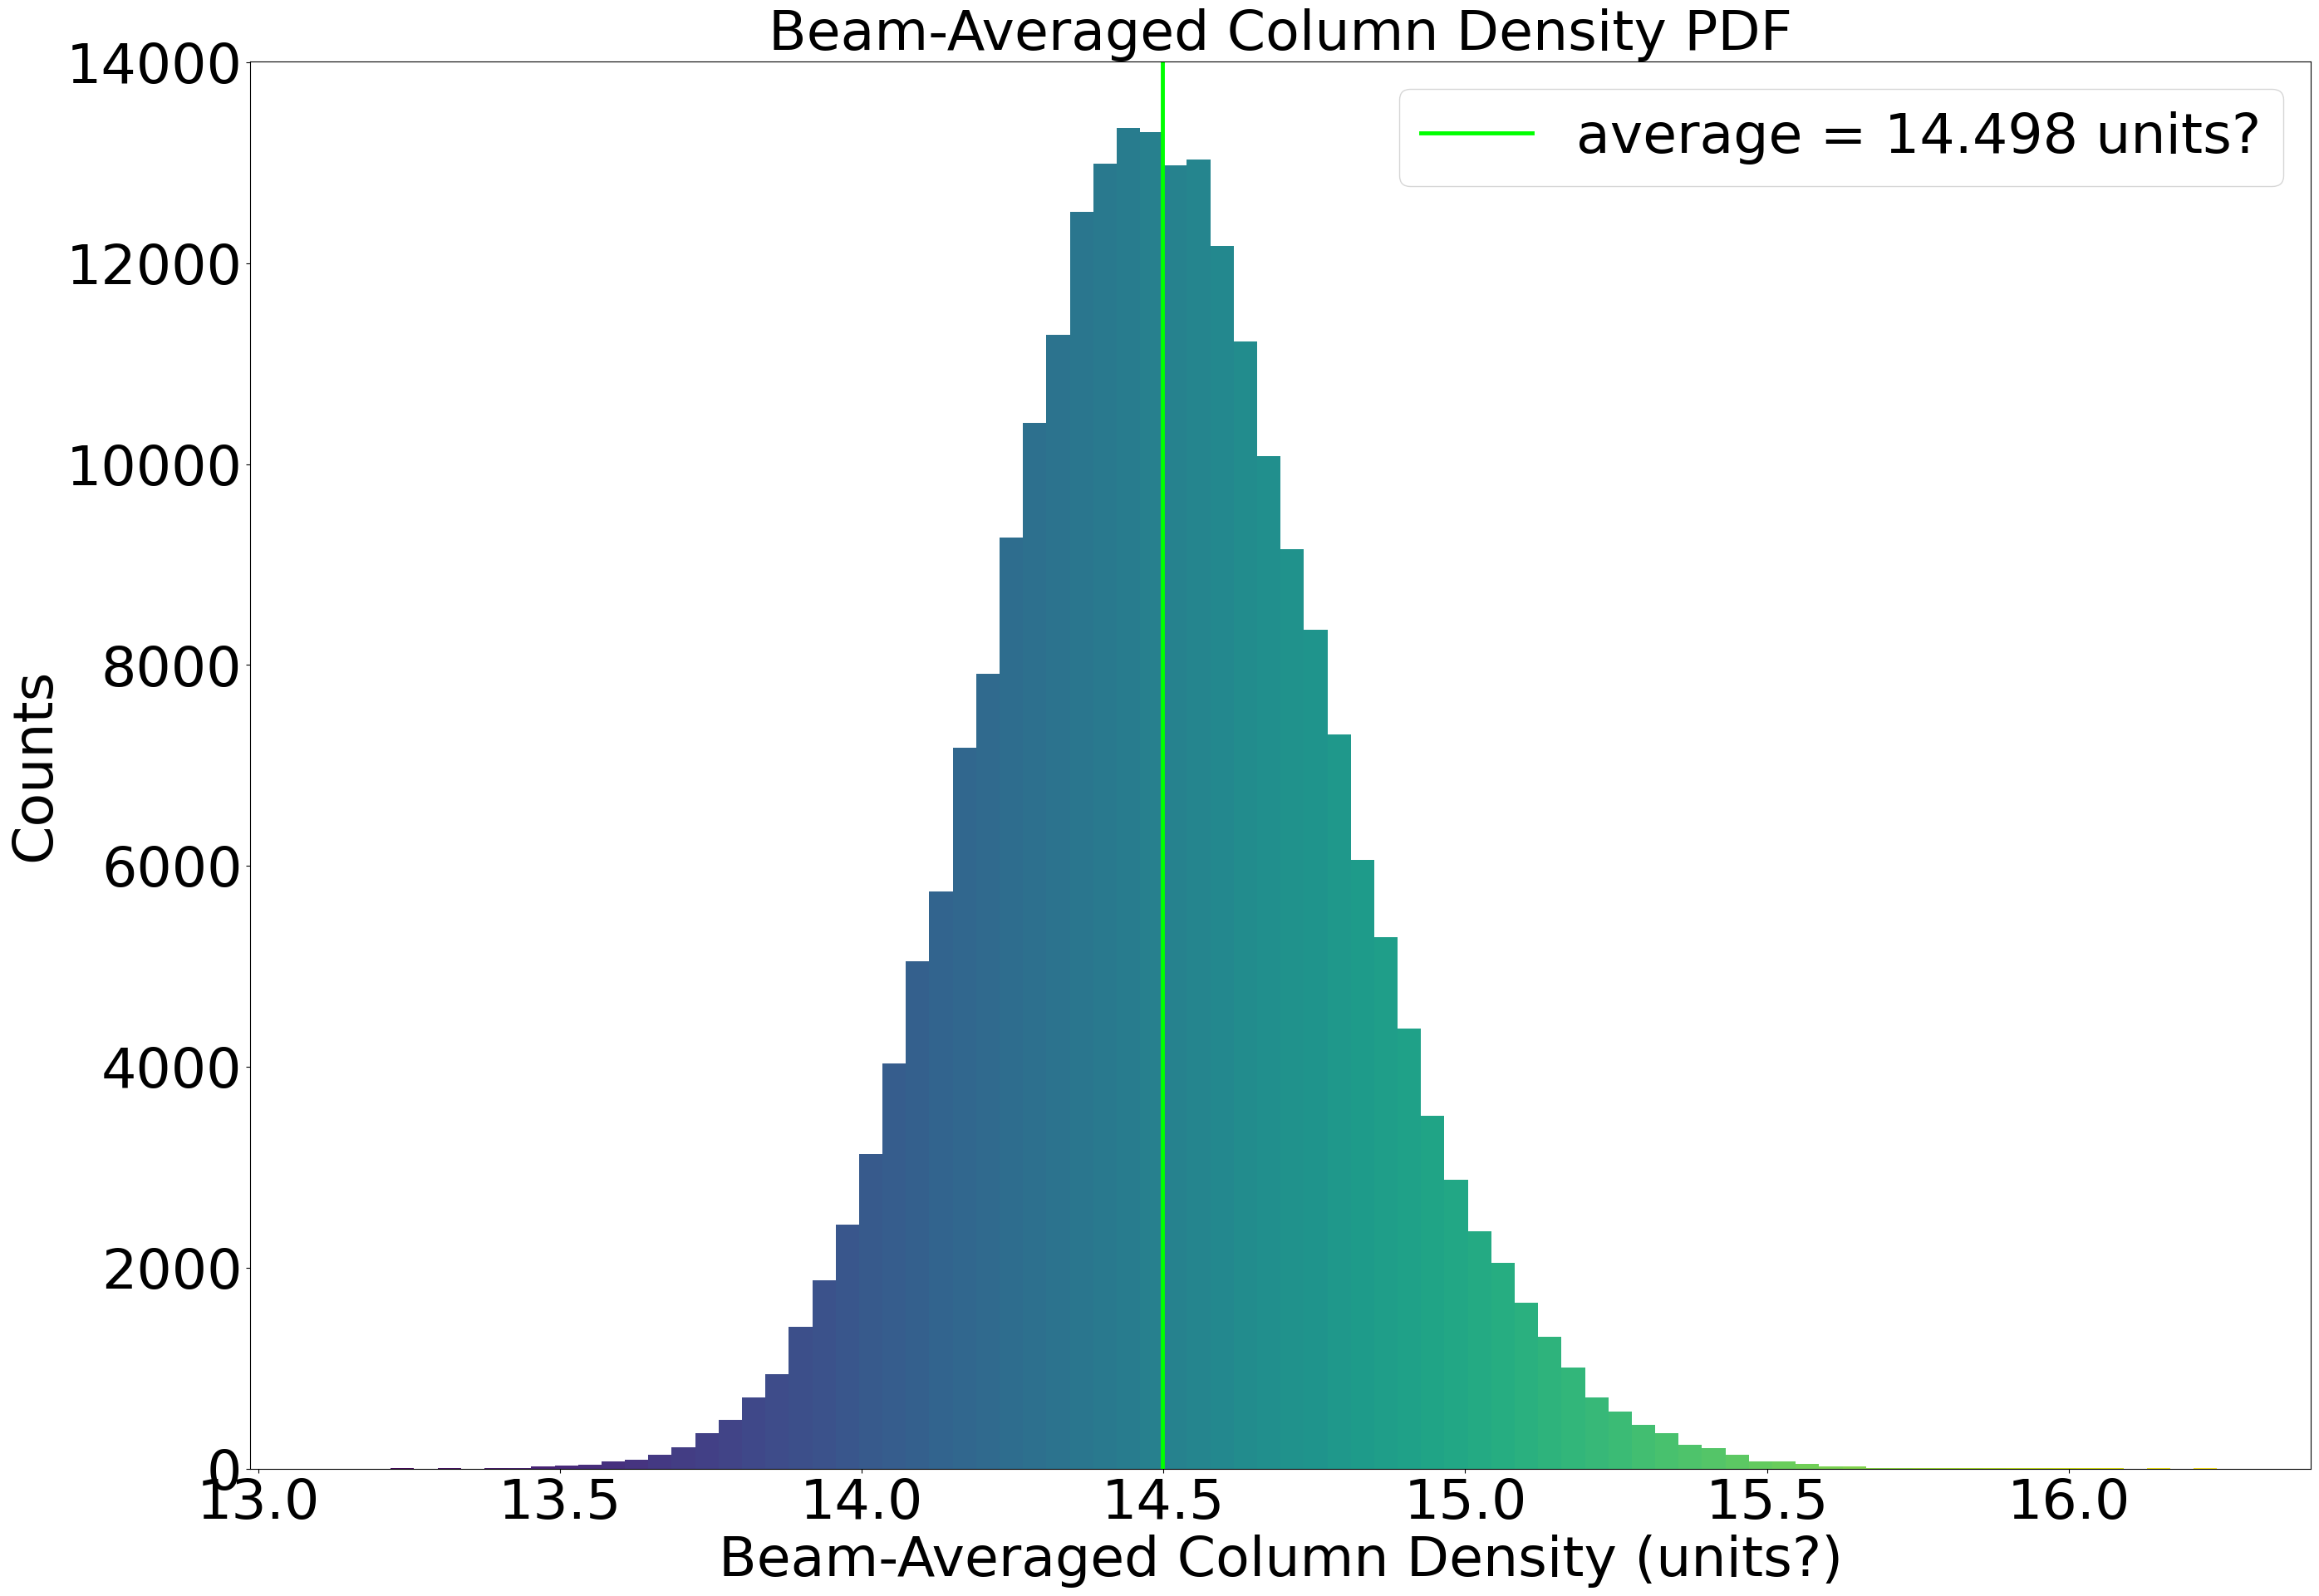

In [5]:
# plotting PDF
N, bins, patches = plt.hist(cd_vals, bins=80)
print(cd_vals)
# calculating statistics
mean_val = statistics.mean(cd_vals)
#left_fwhm = find_left_hwhm(hist, bins)
#right_fwhm = find_right_hwhm(hist, bins)

plt.axvline(x = mean_val, color = 'lime',lw=3.5, label = f'average = {mean_val:.3f} units?')
#plt.axvline(x = left_fwhm, color = 'magenta', label = 'left FWHM')
#plt.axvline(x = right_fwhm, color = 'cyan', label = 'right FWHM')

# customizing appearence
f = 48 # fontsize
plt.xlabel('Beam-Averaged Column Density (units?)',fontsize = f)
plt.ylabel('Counts',fontsize = f)
plt.title('Beam-Averaged Column Density PDF',fontsize = f)
plt.legend(loc = "upper right",fontsize = f)
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)

# this stuff gets the colormap gradient
cm = plt.cm.get_cmap('viridis')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

# show / save PDF
figure = plt.gcf()
figure.set_size_inches(32,22)
plt.show()
#plt.savefig('/home/scratch/vandrews/dataproducts/hf_width_PDF.pdf',dpi = 100)